In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = 'https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Banknote.csv'

In [3]:
Data = pd.read_csv(URL)
Data.head()

,Unnamed: 0,1. variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,0,3.62160,8.6661,-2.8073,-0.44699,0
1,1,4.54590,8.1674,-2.4586,-1.46210,0
2,2,3.86600,-2.6383,1.9242,0.10645,0
3,3,3.45660,9.5228,-4.0112,-3.59440,0
4,4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
Data.tail()

,Unnamed: 0,1. variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
1367,1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
Data.drop(['Unnamed: 0'],axis =1, inplace =True)

In [6]:
Data

,1. variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   1. variance of Wavelet Transformed image  1372 non-null   float64
 1   skewness of Wavelet Transformed image     1372 non-null   float64
 2   curtosis of Wavelet Transformed image     1372 non-null   float64
 3   entropy of image                          1372 non-null   float64
 4   class                                     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
Data.isna().sum()

1. variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image       0
curtosis of Wavelet Transformed image       0
entropy of image                            0
class                                       0
dtype: int64

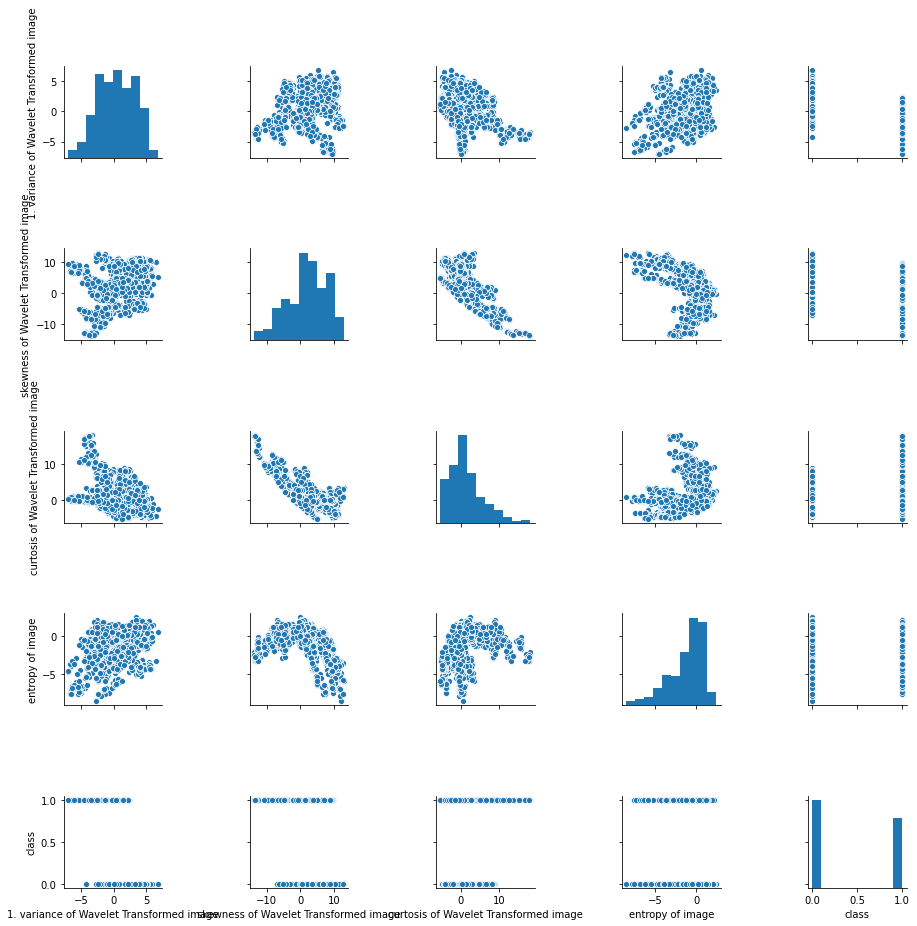

In [17]:
sns.pairplot(Data)

In [9]:
features_mean= list(Data.columns[1:5])
features_mean

['skewness of Wavelet Transformed image',
 'curtosis of Wavelet Transformed image',
 'entropy of image',
 'class']

In [10]:
X = Data.loc[:,features_mean]
y = Data['class']

In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [12]:
X.isna().sum()

skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
import time

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
LR = LogisticRegression(max_iter=200)
LR

LogisticRegression(max_iter=200)

In [17]:
LR.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [18]:
Train_Score = LR.score(X_train,y_train)
Train_Score

1.0

In [19]:
Test_score = LR.score(X_test,y_test)
Test_score

1.0

In [20]:
yhat = LR.predict(X_test)

In [21]:
pd.DataFrame({"Actual Data":y_test,
             "New_predication":yhat})


,Actual Data,New_predication
430,0,0
588,0,0
296,0,0
184,0,0
244,0,0
...,...,...
1341,1,1
1100,1,1
620,0,0
617,0,0


In [22]:
log_loss = LR.predict_proba(X_train)

In [23]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [24]:
cm = confusion_matrix(y_test,yhat)

In [25]:
cm

array([[148,   0],
       [  0, 127]], dtype=int64)

In [26]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [27]:
accuracy_score(y_test,yhat)

1.0

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
Knn = KNeighborsClassifier(n_neighbors=10)

In [30]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
Train_score = Knn.score(X_train,y_train)

In [32]:
Train_Score

1.0

In [33]:
Test_score = Knn.score(X_test,y_test)

In [34]:
Test_score

0.9818181818181818

In [35]:
Knn.classes_

array([0, 1], dtype=int64)

In [36]:
Knn.predict_proba(X_train)

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       ...,
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ]])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[127   0]
 [  0 148]]


Confusion matrix, without normalization
[[127   0]
 [  0 148]]


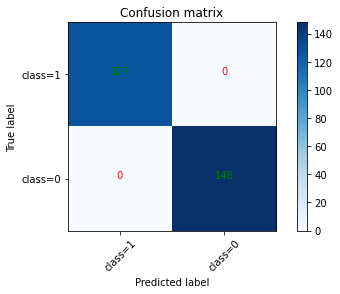

In [39]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=1','class=0'],normalize= False,  title='Confusion matrix')


In [40]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [41]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
print(y_pred_proba)
from sklearn import metrics

[7.67e-03 9.08e-03 1.28e-02 1.20e-03 4.15e-03 2.38e-02 2.04e-03 9.72e-03
 8.76e-03 1.90e-03 9.86e-01 9.87e-01 4.31e-03 9.92e-01 1.26e-03 9.93e-01
 9.79e-01 9.79e-01 9.89e-01 9.73e-01 6.17e-03 4.17e-03 9.74e-01 4.27e-03
 9.56e-01 5.73e-03 5.16e-03 9.91e-01 1.33e-02 6.45e-03 9.95e-01 4.89e-03
 7.50e-03 9.18e-01 9.72e-01 6.56e-03 9.85e-01 9.90e-01 9.88e-01 3.95e-03
 5.90e-03 9.94e-01 9.86e-01 5.88e-03 9.79e-01 9.93e-01 9.86e-01 4.17e-02
 3.73e-02 9.93e-01 3.61e-02 6.91e-03 5.40e-03 5.94e-03 2.51e-03 9.86e-01
 6.80e-03 5.09e-03 5.86e-02 6.14e-03 9.90e-01 5.88e-03 9.97e-01 5.23e-03
 1.85e-03 6.43e-03 6.21e-03 2.22e-03 5.35e-03 9.98e-01 9.82e-01 8.73e-03
 9.94e-01 7.49e-03 9.88e-01 5.18e-02 2.67e-02 9.88e-01 9.79e-01 9.85e-01
 9.88e-01 2.86e-02 9.96e-01 9.79e-03 7.81e-02 1.01e-02 2.50e-03 9.68e-01
 9.97e-01 2.10e-03 3.76e-03 6.14e-03 9.83e-01 9.89e-01 6.65e-03 9.76e-01
 9.62e-01 1.56e-02 6.97e-03 1.26e-02 9.86e-01 1.70e-02 2.42e-03 5.87e-03
 9.21e-01 7.51e-03 6.11e-03 9.96e-01 9.92e-01 9.80e

In [42]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [43]:
fpr

array([0.  , 0.  , 0.  , 0.01, 0.03, 0.3 , 0.32, 1.  ])

In [44]:
tpr

array([0.  , 0.01, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [45]:
_

array([2.00e+00, 9.98e-01, 9.18e-01, 5.86e-02, 5.18e-02, 9.25e-03,
       9.08e-03, 6.06e-04])

In [46]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

1.0

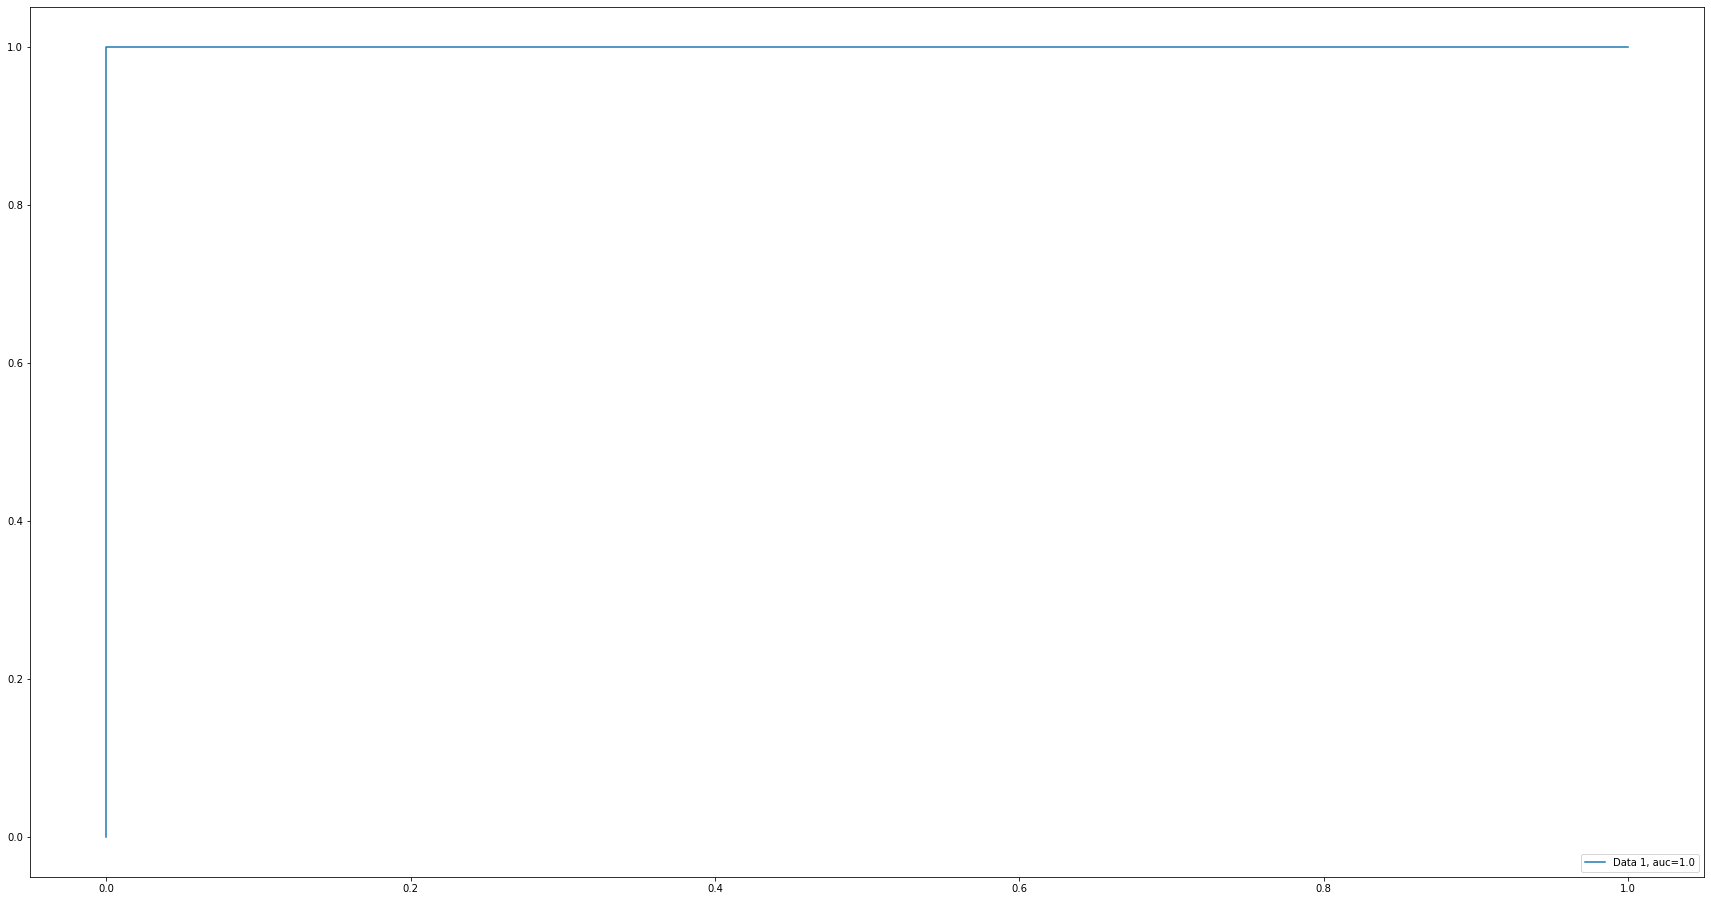

In [47]:
plt.figure(figsize=(30,16))
plt.plot(fpr,tpr,label="Data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()